In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from pyswarm import pso

In [7]:
def load_image(image_path, color=True):
    if color:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image


# Flatten the image to a 2D array of pixels or a 1D array of gray-scale pixels


def flatten_image(image):
    if len(image.shape) == 3:
        pixels = image.reshape(-1, 3)
    else:
        pixels = image.reshape(-1, 1)
    return pixels


# Define the objective function for PSO


def objective_function(positions, pixels):
    # Reshape the positions to cluster centroids
    if len(pixels[0]) == 3:
        centroids = positions.reshape(-1, 3)
    else:
        centroids = positions.reshape(-1, 1)
    # dign each pixel to the closest centroid
    labels = KMeans(n_clusters=len(centroids), init=centroids, n_init=1).fit_predict(
        pixels
    )
    # Calculate the mean squared error between the original pixels and the centroids
    mse = np.mean((pixels - centroids[labels]) ** 2)
    return mse


# Perform PSO optimization


def perform_pso_optimization(pixels, num_centroids, num_particles):
    lower_bound = np.zeros(pixels.shape[1] * num_centroids)
    upper_bound = np.ones(pixels.shape[1] * num_centroids) * 255
    result, _ = pso(
        objective_function,
        lower_bound,
        upper_bound,
        args=(pixels,),
        swarmsize=num_particles,
        maxiter=200,
        debug=True,
    )
    # Reshape the optimized result to get the final centroids
    if pixels.shape[1] == 3:
        centroids = result.reshape(-1, 3)
    else:
        centroids = result.reshape(-1, 1)
    return centroids

In [ ]:
image_path = "cam.jpeg"
num_centroids = 2
num_particles = num_centroids * 3
color = False
image = load_image(image_path, False)
pixels = flatten_image(image)
centroids = perform_pso_optimization(pixels, num_centroids, num_particles)
labels = KMeans(n_clusters=len(centroids), init=centroids, n_init=1).fit_predict(pixels)

No constraints given.
Best after iteration 1: [207.2132522   93.58676843] 616.3126130934472
New best for swarm at iteration 2: [182.45331483   5.57365169] 615.8615248223175
New best for swarm at iteration 2: [ 85.28252095 188.60331297] 508.7769164990137
Best after iteration 2: [ 85.28252095 188.60331297] 508.7769164990137
New best for swarm at iteration 3: [ 85.46863133 205.51436171] 500.67916574962874
Best after iteration 3: [ 85.46863133 205.51436171] 500.67916574962874
Best after iteration 4: [ 85.46863133 205.51436171] 500.67916574962874
New best for swarm at iteration 5: [ 56.93702609 206.4313806 ] 328.85944929061526
New best for swarm at iteration 5: [ 46.12855472 205.82288638] 300.6676757099899
Best after iteration 5: [ 46.12855472 205.82288638] 300.6676757099899
New best for swarm at iteration 6: [ 65.73267722 198.5495455 ] 294.45482469617633
New best for swarm at iteration 6: [ 47.89921009 196.55202427] 239.98780677514955
Best after iteration 6: [ 47.89921009 196.55202427] 239

In [ ]:
print("Centroids: ", centroids)
print("Image Shape: ", image.shape)
print("Pixel Shape: ", pixels.shape)
print("Labels Shape:", labels.shape)
print("Labels: ", labels)

reshaped_label = labels.reshape(image.shape)
print("Reshaped Labels Shape: ", reshaped_label.shape)

mask = reshaped_label == 0
masked_image = np.where(mask, image, 255).astype(np.uint8)

cv2.imwrite("static/segmented_image.jpg", masked_image)

Centroids:  [[ 44.33081897]
 [197.39346348]]
Image Shape:  (500, 500)
Pixel Shape:  (250000, 1)
Labels Shape: (250000,)
Labels:  [1 1 1 ... 1 1 1]
Reshaped Labels Shape:  (500, 500)


True

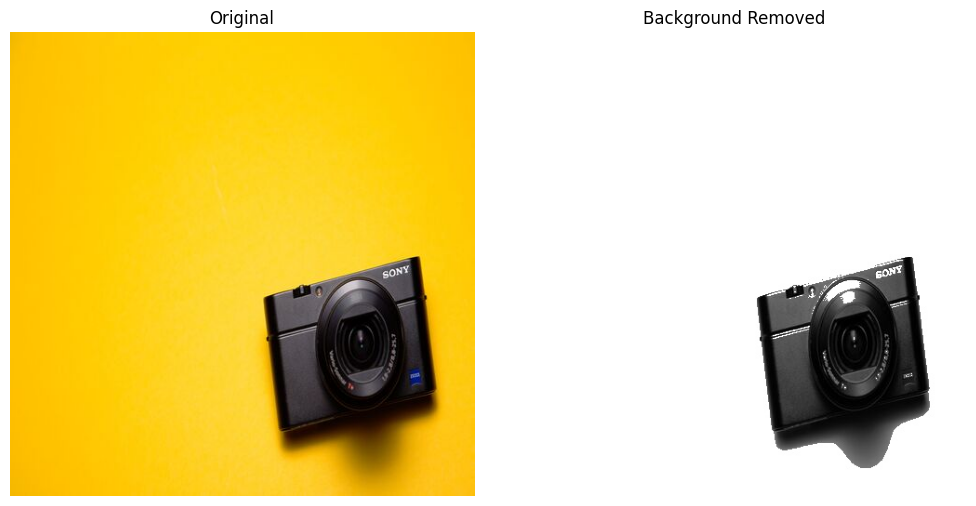

In [27]:
import matplotlib.pyplot as plt
import cv2

# Example: Load two images
img1 = cv2.imread(image_path)
img2 = cv2.imread("static/segmented_image.jpg")

# Convert BGR to RGB for matplotlib
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Plot side by side
plt.figure(figsize=(10, 5))  # Adjust size as needed

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Background Removed")
plt.axis("off")

plt.tight_layout()
plt.show()